!mkdir -p ~/.kaggle

!cp kaggle.json ~/.kaggle/

!kaggle datasets download -d zalando-research/fashionmnist

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers  import Dense, Conv2D, MaxPooling2D,  Flatten, BatchNormalization,  Dropout



In [ ]:
(x_train, y_train), (x_test, y_test) =keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 2s 0us/step


In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
y_train[0]

9

In [ ]:
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot

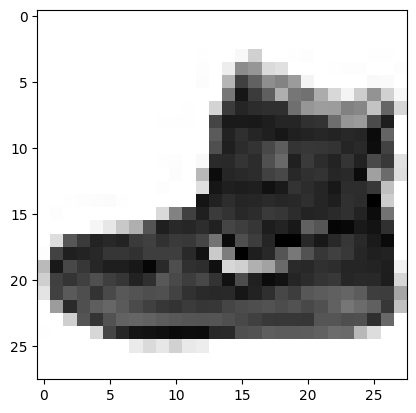

In [ ]:
plt.imshow(x_train[0], cmap ='Greys')

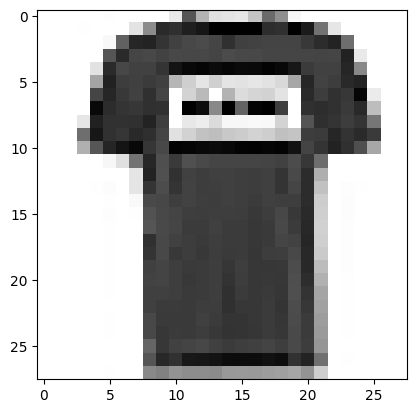

In [ ]:
plt.imshow(x_train[1], cmap ='Greys')

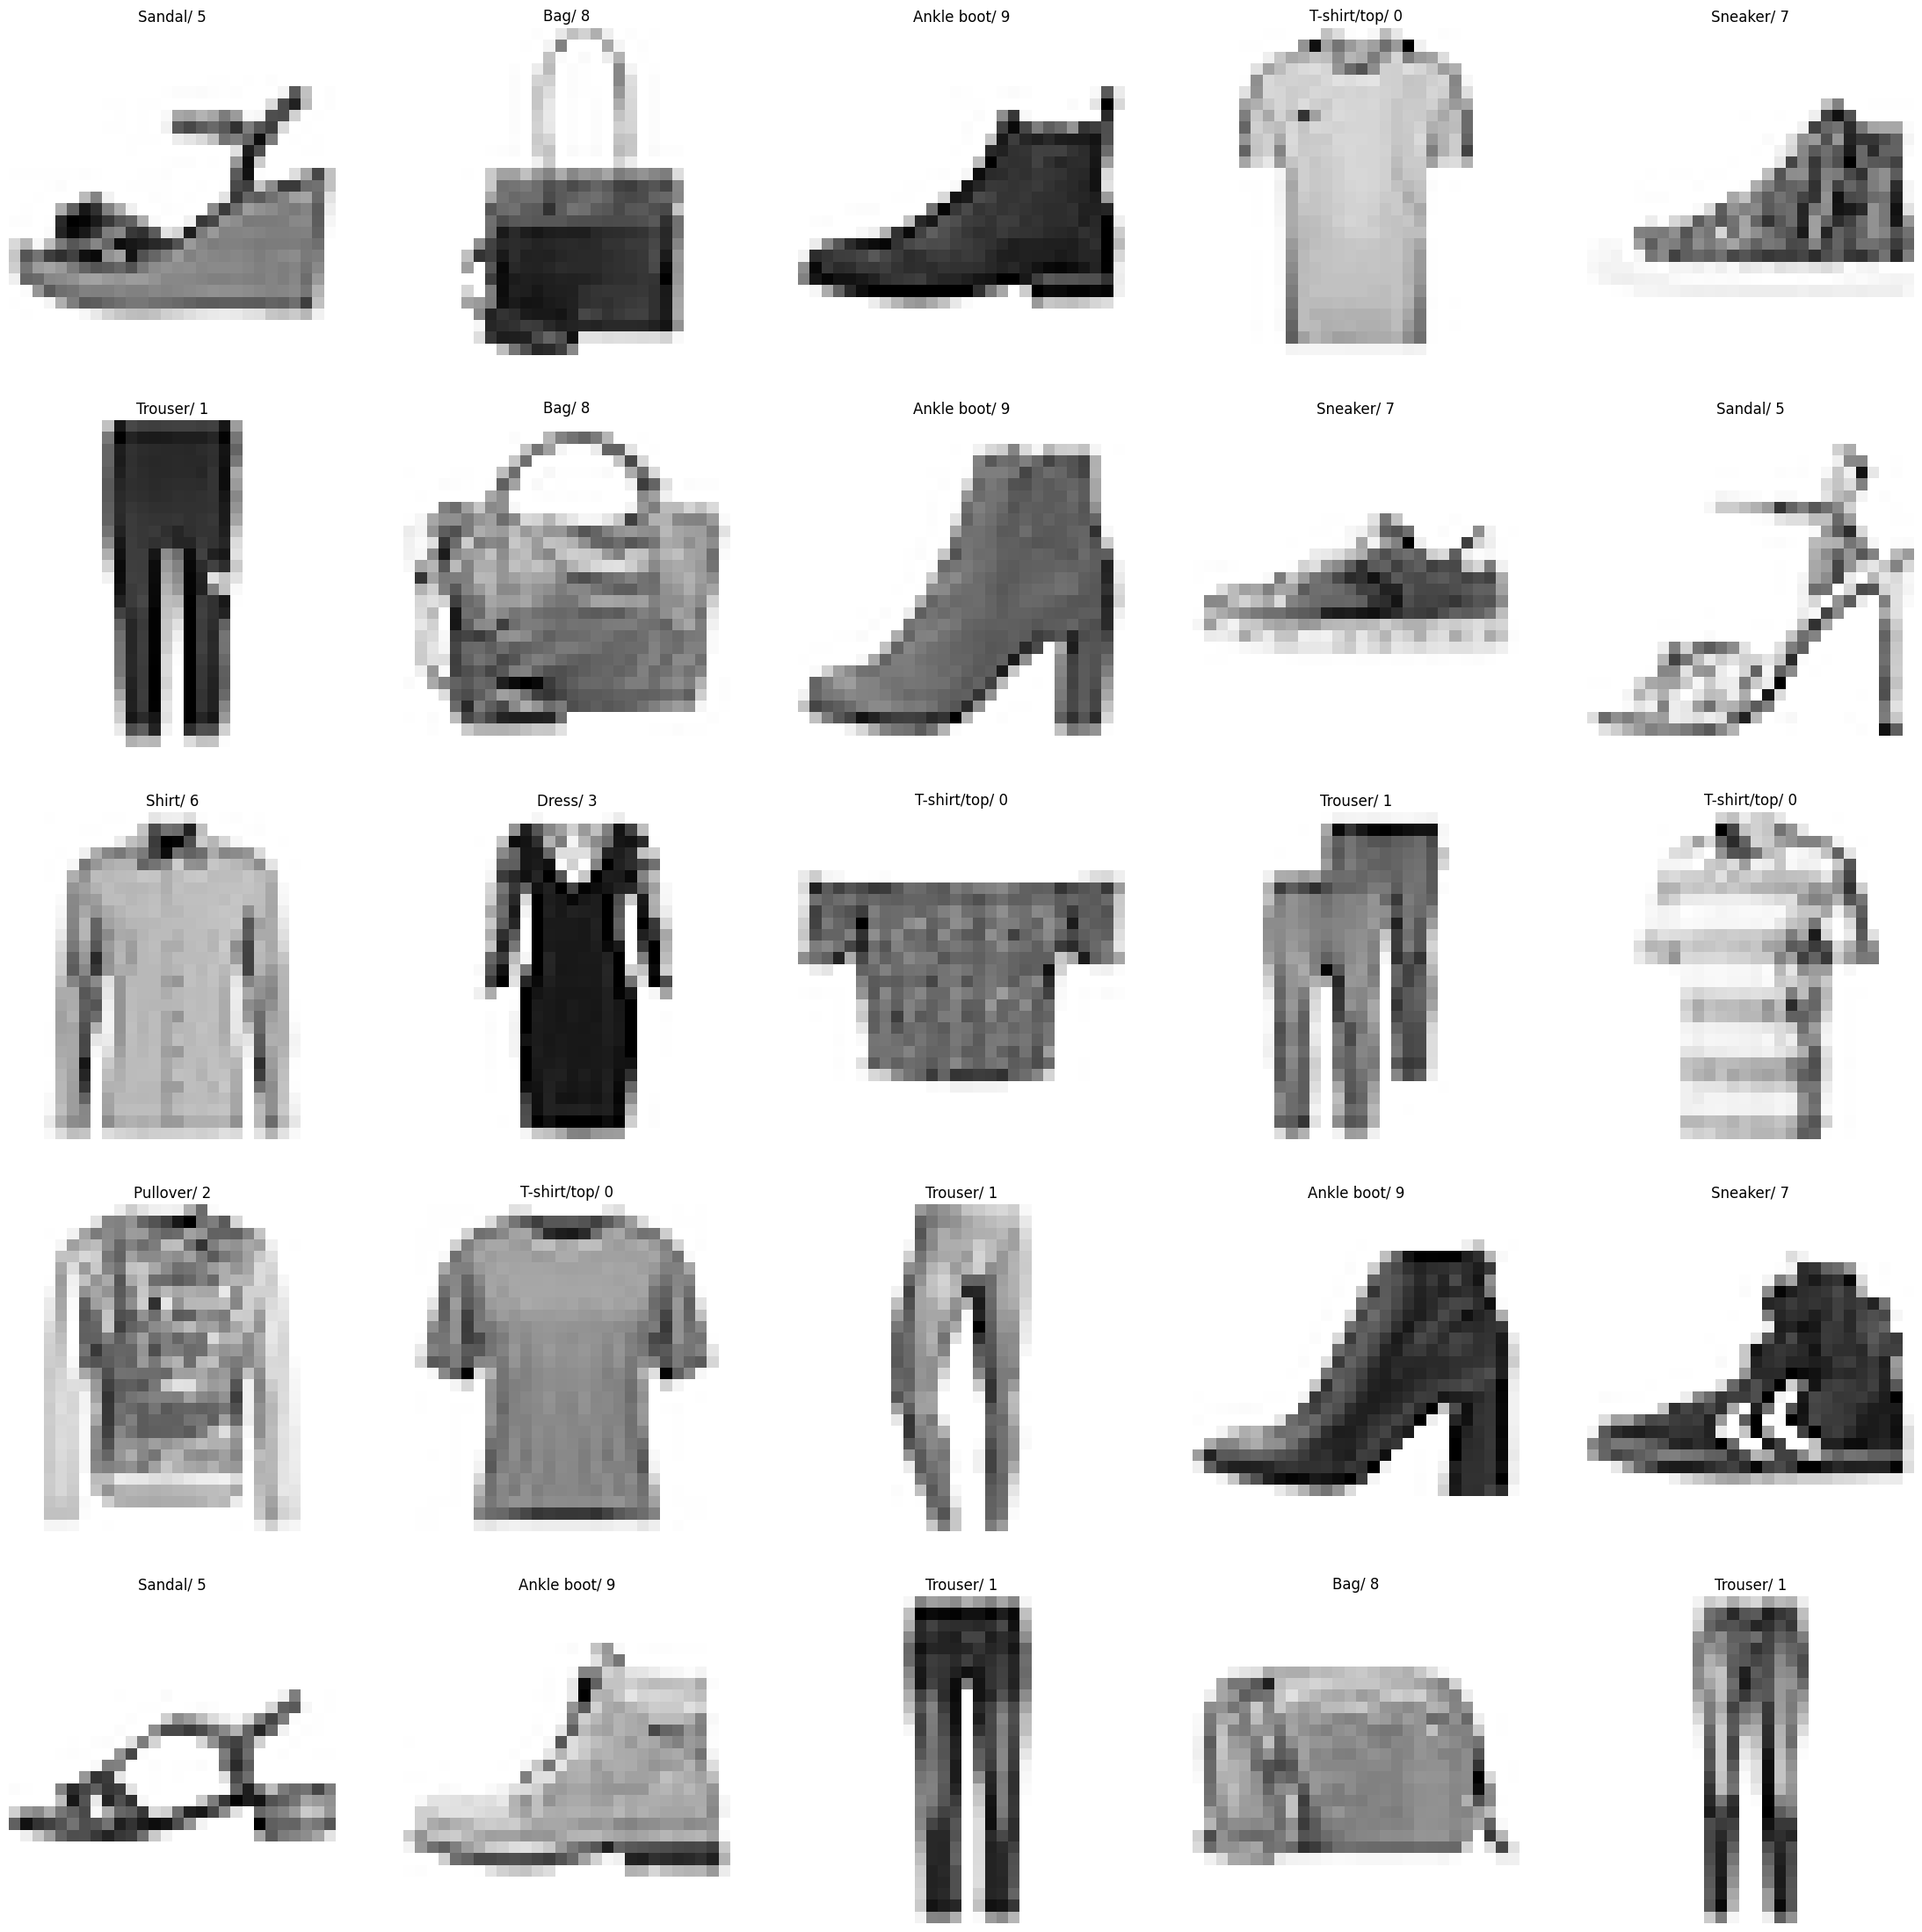

In [ ]:
plt.figure(figsize = (28,28))

j=1
for i in np.random.randint(0, 1000,25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(x_train[i], cmap ="Greys")
  plt.axis('off')
  plt.title('{}/ {}'.format(class_labels[y_train[i]], y_train[i]))

Change Dimension


In [ ]:
x_train.ndim

3

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train =np.expand_dims(x_train, -1)
x_test =np.expand_dims(x_test, -1)

In [ ]:
x_train.ndim

4

In [ ]:
x_train.shape

(60000, 28, 28, 1)

Feature Scaling

In [ ]:
x_train =x_train/255
x_test =x_test/255



In [ ]:
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

Split Dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size= 0.2,  random_state = 22)

In [ ]:
x_train.shape, y_train.shape

((48000, 28, 28, 1), (48000,))

In [ ]:
x_val.shape, y_val.shape

((12000, 28, 28, 1), (12000,))

CNN Model

In [ ]:
#create CNN Model
model =Sequential()

model.add(Conv2D(32, kernel_size =(3,3), padding ='valid', activation ='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2),  strides =2, padding ='valid'))

model.add(Conv2D(64, kernel_size =(3,3), padding ='valid', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2),  strides =2, padding ='valid'))

model.add(Conv2D(128, kernel_size =(3,3), padding ='valid', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2),  strides =2, padding ='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation ='softmax'))


In [ ]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_6 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_7 (Batc  (None, 11, 11, 64)       256       
 hNormalization)                                                 
                                                      

In [ ]:
model.compile(optimizer= 'adam',  loss ='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history= model.fit(x_train, y_train, epochs =15,  batch_size=512, verbose= 1,  validation_data= (x_val, y_val))

Epoch 1/15
94/94 [==============================] - 2s 18ms/step - loss: 0.1211 - accuracy: 0.9546 - val_loss: 0.3987 - val_accuracy: 0.8754
Epoch 2/15
94/94 [==============================] - 1s 15ms/step - loss: 0.1095 - accuracy: 0.9596 - val_loss: 0.3842 - val_accuracy: 0.8827
Epoch 3/15
94/94 [==============================] - 1s 15ms/step - loss: 0.0970 - accuracy: 0.9642 - val_loss: 0.4143 - val_accuracy: 0.8756
Epoch 4/15
94/94 [==============================] - 1s 16ms/step - loss: 0.0850 - accuracy: 0.9681 - val_loss: 0.4267 - val_accuracy: 0.8866
Epoch 5/15
94/94 [==============================] - 1s 16ms/step - loss: 0.0760 - accuracy: 0.9727 - val_loss: 0.4323 - val_accuracy: 0.8791
Epoch 6/15
94/94 [==============================] - 1s 16ms/step - loss: 0.0640 - accuracy: 0.9769 - val_loss: 0.4660 - val_accuracy: 0.8813
Epoch 7/15
94/94 [==============================] - 1s 16ms/step - loss: 0.0599 - accuracy: 0.9787 - val_loss: 0.5146 - val_accuracy: 0.8826
Epoch 8/15
94

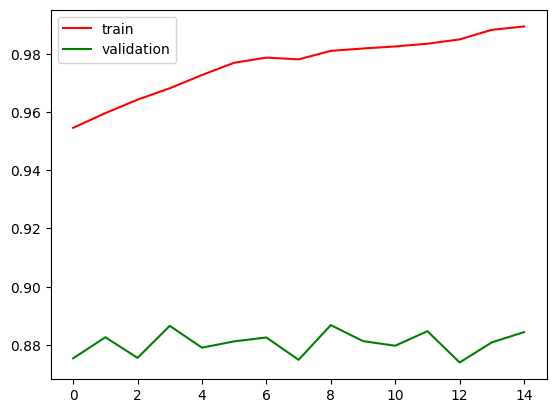

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color ='red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'green', label ='validation')
plt.legend()
plt.show()

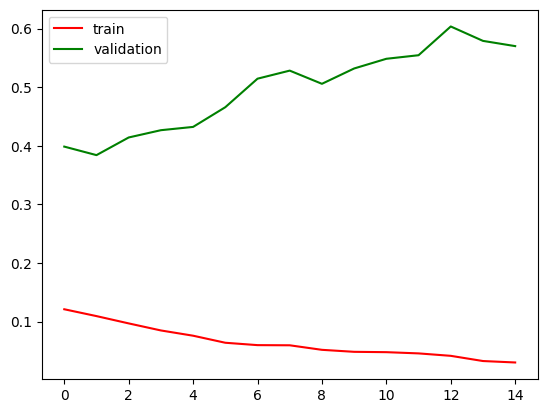

In [ ]:
plt.plot(history.history['loss'],  color='red',  label ='train')
plt.plot(history.history['val_loss'], color ='green', label ='validation')
plt.legend()
plt.show()

In [ ]:
model.predict(np.expand_dims(x_test[0], axis=0)).round(2)

1/1 [==============================] - 0s 291ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
np.argmax(model.predict(np.expand_dims(x_test[0], axis=0)).round(2))

1/1 [==============================] - 0s 44ms/step


9

In [ ]:
y_test[0]

9

In [ ]:
y_pred = model.predict(x_test).round(2)
y_pred

313/313 [==============================] - 1s 3ms/step


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.5744 - accuracy: 0.8871


[0.5743944048881531, 0.8870999813079834]

Accuracy in Training Dataset: 0.989
Accuracy in Testing Dataset:  0.887

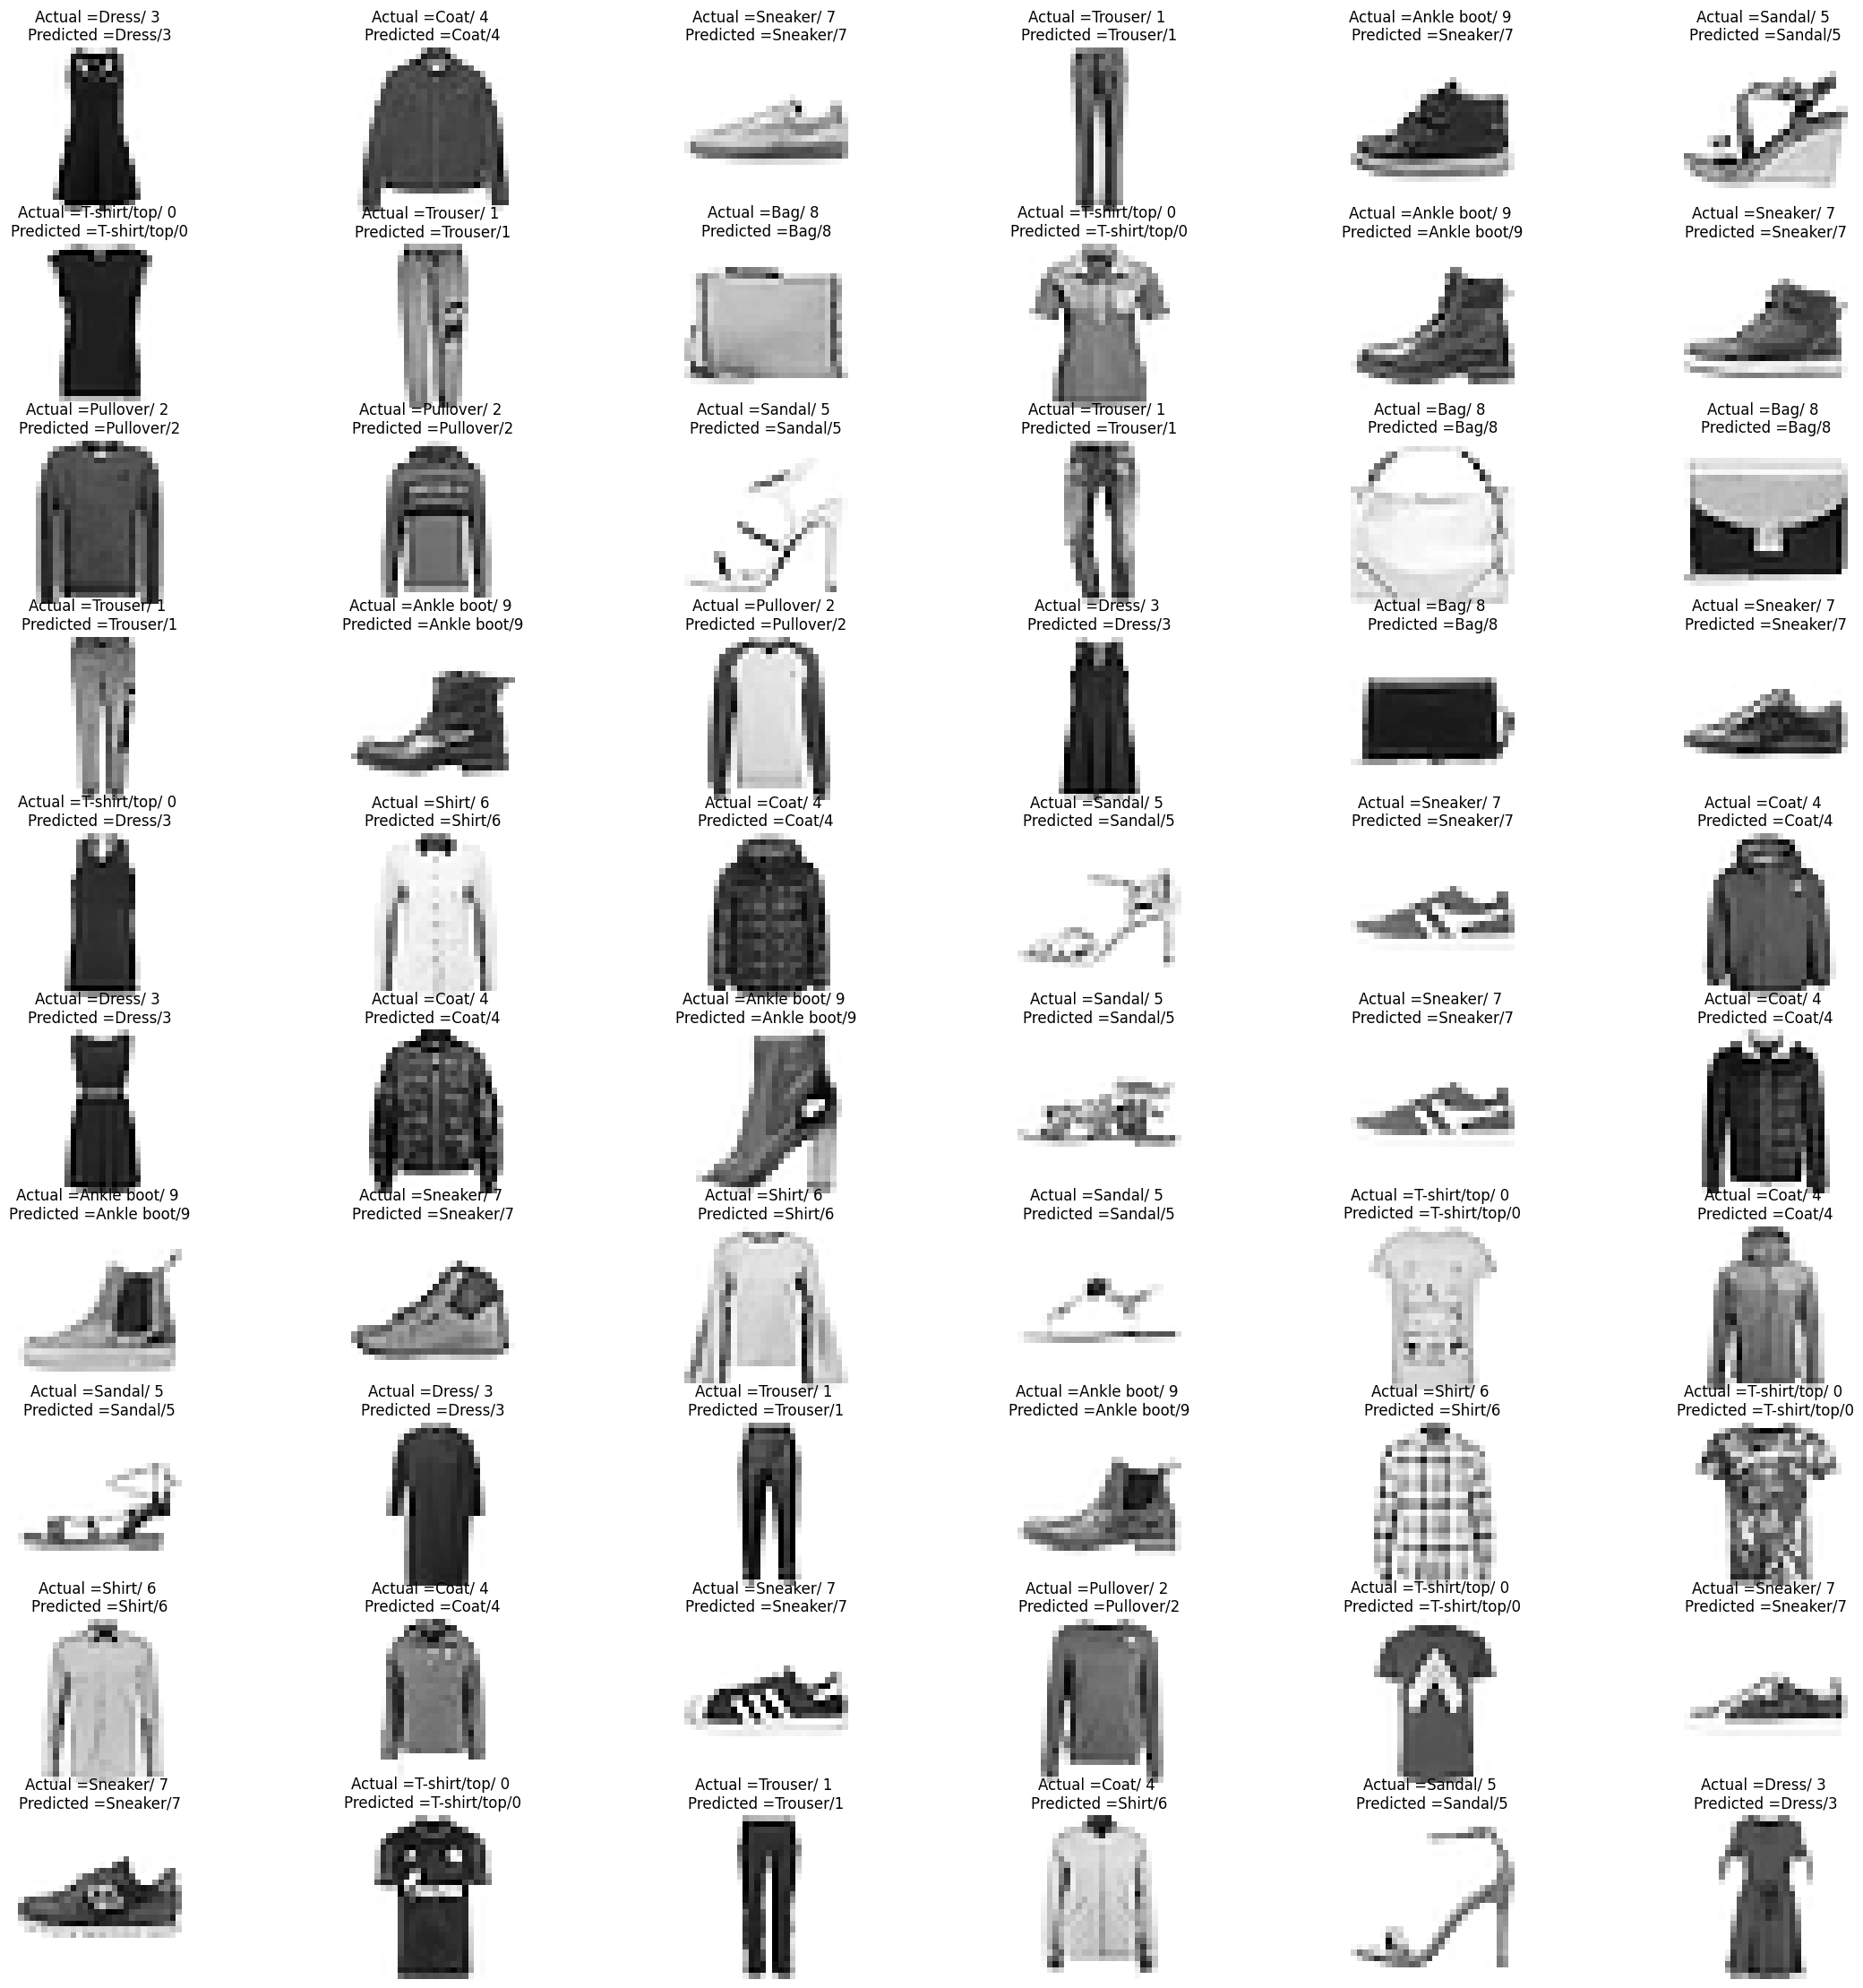

In [ ]:
plt.figure(figsize = (28,28))

j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(x_test[i].reshape(28,28), cmap ='Greys')
  plt.axis('off')
  plt.title('Actual ={}/ {} \nPredicted ={}/{}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))

Confusion Matrix

<Axes: >

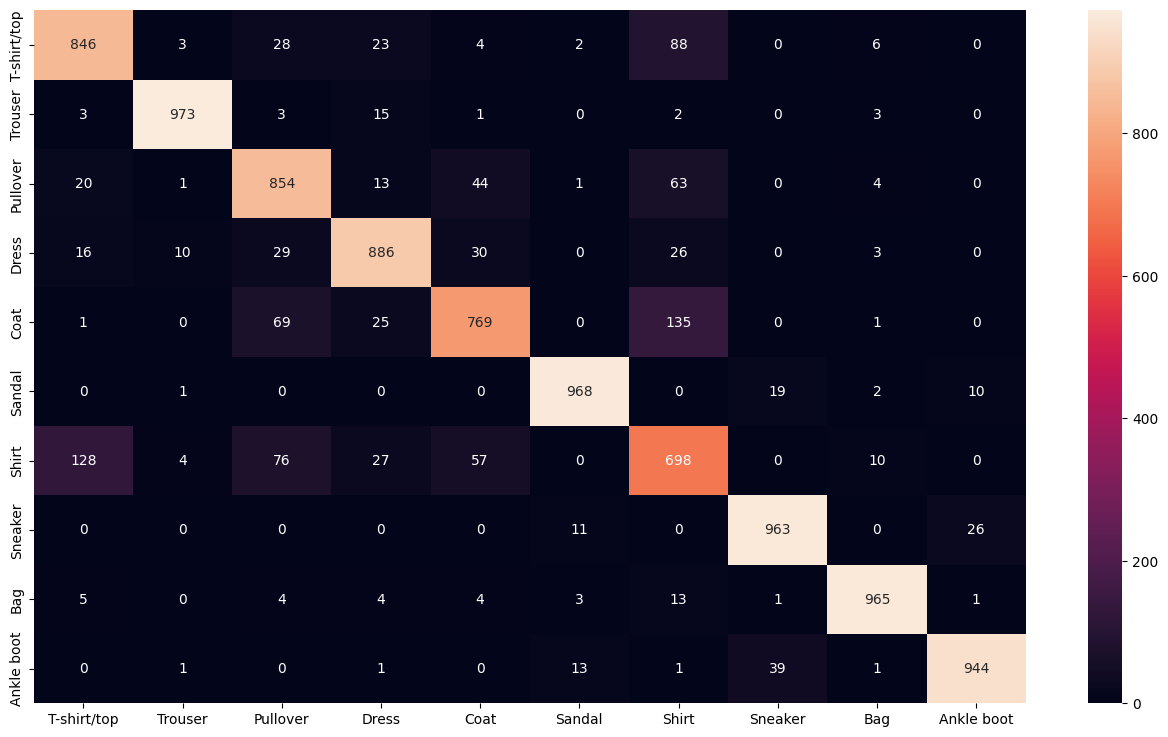

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
y_pred_labels =[np.argmax(label) for label in y_pred]
cm= confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True, fmt='d', xticklabels =class_labels, yticklabels=class_labels)

In [ ]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names = class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.85      0.84      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.80      0.85      0.83      1000
       Dress       0.89      0.89      0.89      1000
        Coat       0.85      0.77      0.81      1000
      Sandal       0.97      0.97      0.97      1000
       Shirt       0.68      0.70      0.69      1000
     Sneaker       0.94      0.96      0.95      1000
         Bag       0.97      0.96      0.97      1000
  Ankle boot       0.96      0.94      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
model.save('mnist_fashion_classification.h5')

In [ ]:
import cv2

In [ ]:
test_img =cv2.imread('/content/Jacket_test.JPG')


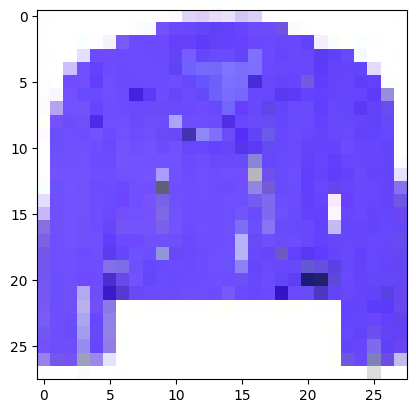

In [ ]:
plt.imshow(test_img, cmap = 'Greys')


In [ ]:
test_img.shape

(28, 28, 3)

In [ ]:
test_img =cv2.resize(test_img,(28,28))

In [ ]:
model.predict(test_input).round(2)

1/1 [==============================] - 0s 35ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.22, 0.  , 0.76]],
      dtype=float32)